<img src="../../images/brownbear.png" width="400">

## A financial tool that can analyze and maximize investment portfolios on a risk adjusted basis  


Description: This notebook is useful for examining potfolios comprised of stocks from the 'total market' which we define as sp500, sp400, nasdaq100, and dow30.  Construct portfolios from the 'total market' and examine the results of different weighting schemes.


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import brownbear as bb

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# display all rows
pd.set_option('display.max_rows', None)

# do not truncate column names
pd.set_option('display.max_colwidth', None)

%matplotlib inline

In [3]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

### Some Globals

In [4]:
investment_universe = ['sp500-galaxy', 'sp400-galaxy', 'sp600-galaxy', 'nasdaq100-galaxy', 'dow30-galaxy']
risk_free_rate = 0
annual_returns = '3 Yr'
vola = 'Vola'
ds_vola = 'DS Vola'

In [5]:
# Fetch Investment Options - all values annualized
df = bb.fetch(investment_universe, risk_free_rate, annual_returns, vola, ds_vola)
df

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
0,MMM,3M,US Stocks:Industrials,40.39,104.73,105.58,13.52,9.02,20.25,11.94,31.88,13.52,0.42
1,AOS,A. O. Smith,US Stocks:Industrials,-34.55,-38.43,-17.82,1.11,12.18,16.35,9.07,29.41,1.11,0.04
2,ABT,Abbott Laboratories,US Stocks:Healthcare,150.10,90.24,17.94,7.64,13.19,17.93,10.52,19.85,7.64,0.38
3,ABBV,AbbVie,US Stocks:Healthcare,728.53,101.68,21.04,16.82,23.67,21.00,4.58,22.55,16.82,0.75
4,ACN,Accenture,US Stocks:Technology,-57.72,-13.43,-6.64,5.11,13.64,25.13,20.84,24.68,5.11,0.21
5,ADBE,Adobe Inc.,US Stocks:Technology,-8.16,-48.91,-20.62,0.70,4.75,21.33,10.58,38.33,0.70,0.02
6,AMD,Advanced Micro Devices,US Stocks:Technology,-85.58,-74.93,-43.90,-3.10,15.99,40.22,29.39,53.33,-3.10,-165.32
7,AES,AES Corporation,US Stocks:Utilities,92.19,-35.93,-19.65,-14.33,-6.71,55.28,24.05,43.18,-14.33,-618.77
8,AFL,Aflac,US Stocks:Financials,31.19,-10.57,39.32,23.97,21.00,22.95,14.88,23.00,23.97,1.04
9,A,Agilent Technologies,US Stocks:Healthcare,-81.28,-17.55,-2.82,1.20,11.17,22.93,20.16,29.76,1.20,0.04


In [6]:
# Rank
#rank = bb.rank(df, rank_by='Sharpe Ratio')
rank = bb.rank(df, rank_by='Sharpe Ratio', group_by='Asset Subclass', num_per_group=2)
rank_filtered = rank
#rank_filtered = rank.loc[(rank['3 mo'] > 0) & rank['1 Yr'] > 0]
rank_filtered

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
473,VST,Vistra Corp.,US Stocks:Utilities,-83.37,-43.09,164.83,90.19,47.07,64.13,50.64,47.34,90.19,1.91
122,CEG,Constellation Energy,US Stocks:Utilities,-84.00,2.62,61.97,81.51,81.51,51.63,40.19,43.61,81.51,1.87
189,FICO,Fair Isaac,US Stocks:Technology,18.23,-59.20,47.83,60.67,37.03,34.21,16.01,36.21,60.67,1.68
347,NVDA,Nvidia,US Stocks:Technology,12.50,-28.84,58.77,77.47,80.48,53.18,34.24,54.74,77.47,1.42
259,IRM,Iron Mountain,US Stocks:Real Estate,-60.22,-63.67,29.49,35.43,29.74,33.11,26.84,27.59,35.43,1.28
1377,SKT,"Tanger Factory Outlet Centers, Inc.",US Stocks:Real Estate,183.72,-9.71,27.09,35.80,29.42,23.09,8.21,30.43,35.80,1.18
593,CRS,Carpenter Technology,US Stocks:Materials,-11.10,27.43,220.51,81.21,41.53,47.38,22.74,47.93,81.21,1.69
701,KNF,Knife River Corporation,US Stocks:Materials,-57.79,-28.53,32.72,32.72,32.72,42.94,30.05,28.66,32.72,1.14
236,HWM,Howmet Aerospace,US Stocks:Industrials,157.12,93.96,107.68,59.79,34.24,31.85,21.41,34.39,59.79,1.74
397,RSG,Republic Services,US Stocks:Industrials,274.78,41.72,29.92,28.60,21.34,15.64,5.78,17.34,28.60,1.65


### Sample Portfolios
Format 'Investment option': weight

In [7]:
# everything ranked
ranked_portfolio = {
    'Title': 'Ranked Portfolio'
}
everything = list(rank_filtered['Investment Option'])
ranked_portfolio.update(dict.fromkeys(everything, 1/len(everything)))

# top 10
top10_portfolio = {
    'Title': 'Ranked Portfolio'
}
top10 = list(rank_filtered['Investment Option'])[:10]
top10_portfolio.update(dict.fromkeys(top10, 1/len(top10)))

### Custom Portfolios

In [8]:
# My portfolio
my_portfolio = {
    'Title': 'My Portfolio',

}

### Choose Portfolio Option

In [9]:
# Select one of the portfolios from above
portfolio_option = ranked_portfolio

In [10]:
# Make a copy so that the original portfolio is preserved
portfolio_option = portfolio_option.copy()

### Analysis Options

In [11]:
# Specify the weighting scheme.  It will replace the weights specified in the portfolio
# You can also fix the weights on some Investent Options, Asset Classes, and Asset Subclasses
# while the others are automatically calculated.

# 'Equal' - will use equal weights.

# 'Sharpe Ratio' - will use proportionally weighted # allocations based on the percent
#  of an investment option's sharpe ratio to the sum of all the sharpe ratios in the portfolio.

# 'Std Dev' - will use standard deviation adjusted weights

# 'Annual Returns' - will use return adjusted weights

# 'Vola' - will use volatility adjusted weights

# 'DS Vola' - will use downside volatility adjusted weights

# None: 'Investment Option' means use user specified weights
#       'Asset Class' means do not group by Asset Class
#       'Asset Subclass means do not group by Asset Subclass 

weight_by = {
    'Asset Class':       {'weight_by': None},
    'Asset Subclass':    {'weight_by': 'DS Vola'},
    'Investment Option': {'weight_by': 'Annual Returns'},
}
#weight_by = None

In [12]:
bb.DEBUG = False

# Analyze portfolio
annual_ret, std_dev, sharpe_ratio = \
    bb.analyze(df, portfolio_option, weight_by)

,VST,CEG,FICO,NVDA,IRM,SKT,CRS,KNF,HWM,RSG,...,AROC,SFM,WMT,ATGE,LRN,TMUS,TKO,CCEP,APP,Ranked Portfolio
Annual Returns,90.19,81.51,60.67,77.47,35.43,35.80,81.21,32.72,59.79,28.60,...,55.19,72.96,31.73,73.06,60.87,31.44,40.00,21.37,79.54,60.95
Std Dev,47.34,43.61,36.21,54.74,27.59,30.43,47.93,28.66,34.39,17.34,...,35.21,34.04,20.04,41.98,37.51,19.52,29.46,20.14,86.30,27.08
Sharpe Ratio,1.91,1.87,1.68,1.42,1.28,1.18,1.69,1.14,1.74,1.65,...,1.57,2.14,1.58,1.74,1.62,1.61,1.36,1.06,0.92,2.25
Weight,0.04,0.04,0.02,0.02,0.08,0.08,0.06,0.02,0.05,0.03,...,0.02,0.06,0.02,0.03,0.03,0.04,0.05,0.02,0.06,1.00
Worst Typical Down Year,-4.49,-5.71,-11.75,-32.01,-19.75,-25.06,-14.65,-24.60,-8.99,-6.08,...,-15.23,4.88,-8.35,-10.90,-14.15,-7.60,-18.92,-18.91,-93.06,6.79
Black Swan,-51.83,-49.32,-47.96,-86.75,-47.34,-55.49,-62.58,-53.26,-43.38,-23.42,...,-50.44,-29.16,-28.39,-52.88,-51.66,-27.12,-48.38,-39.05,-179.36,-20.29


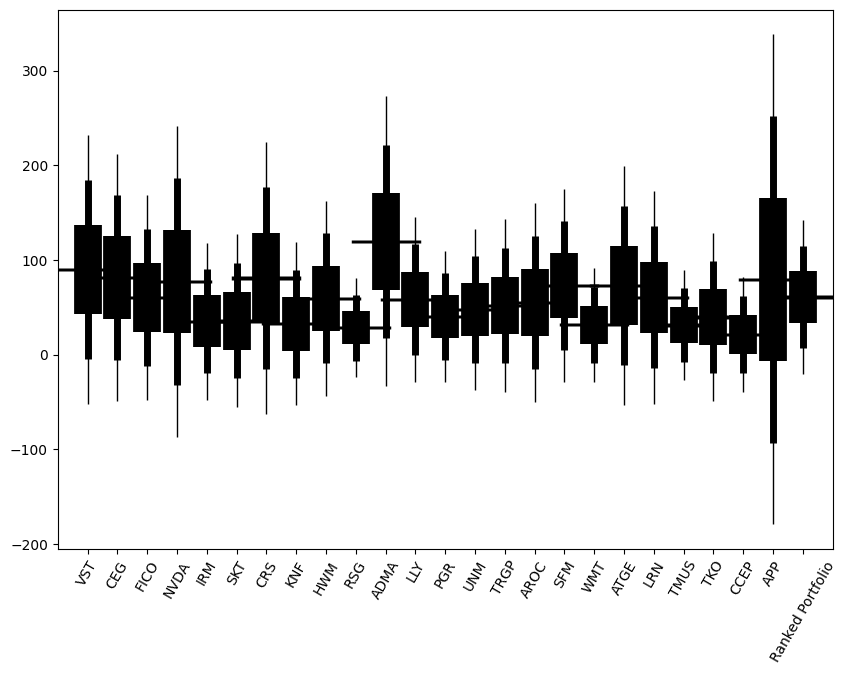

In [13]:
# Display Results
summary = bb.summary(df, portfolio_option, annual_ret, std_dev, sharpe_ratio)
summary

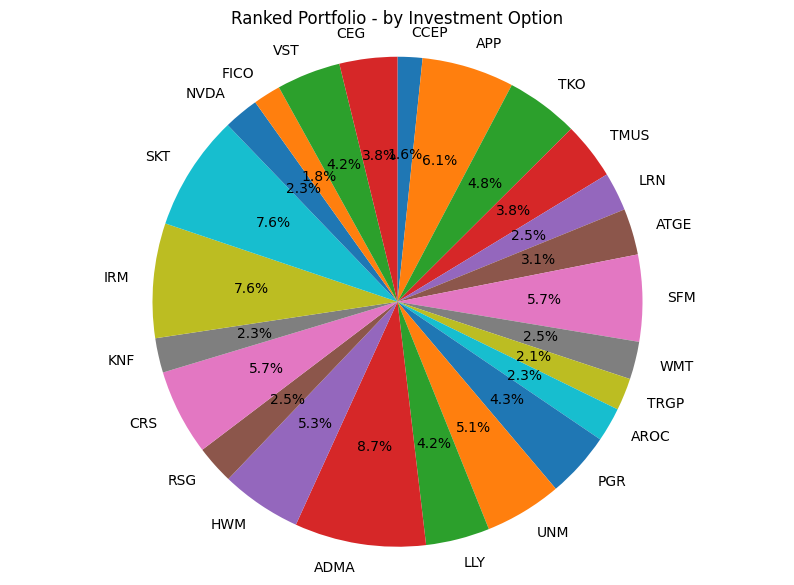

CCEP   0.02
APP    0.06
TKO    0.05
TMUS   0.04
LRN    0.03
ATGE   0.03
SFM    0.06
WMT    0.02
TRGP   0.02
AROC   0.02
PGR    0.04
UNM    0.05
LLY    0.04
ADMA   0.09
HWM    0.05
RSG    0.03
CRS    0.06
KNF    0.02
IRM    0.08
SKT    0.08
NVDA   0.02
FICO   0.02
VST    0.04
CEG    0.04



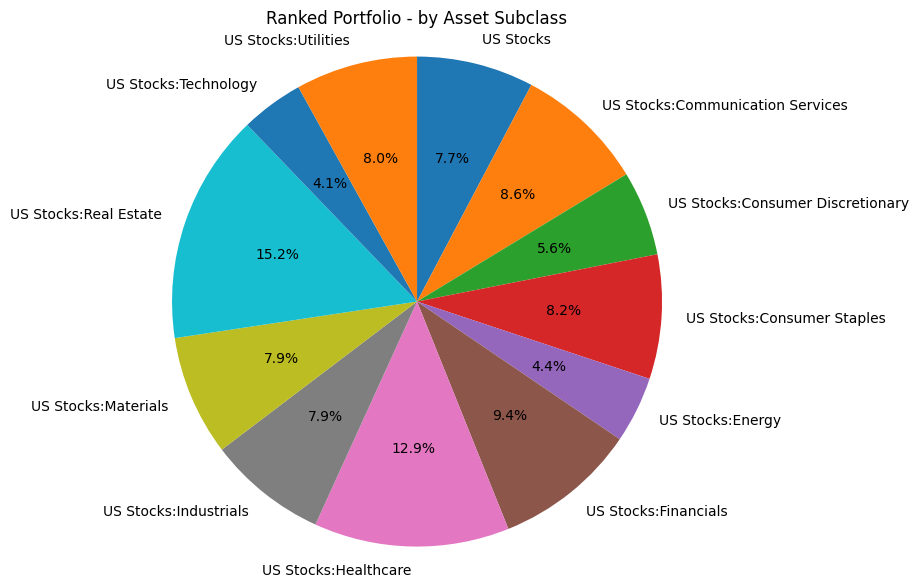

US Stocks                          0.08
US Stocks:Communication Services   0.09
US Stocks:Consumer Discretionary   0.06
US Stocks:Consumer Staples         0.08
US Stocks:Energy                   0.04
US Stocks:Financials               0.09
US Stocks:Healthcare               0.13
US Stocks:Industrials              0.08
US Stocks:Materials                0.08
US Stocks:Real Estate              0.15
US Stocks:Technology               0.04
US Stocks:Utilities                0.08



In [14]:
# Show pie charts of investment and asset class weights
bb.show_pie_charts(df, portfolio_option, charts=['Investment Option', 'Asset Subclass'])

In [15]:
# Show exact weights
bb.print_portfolio(portfolio_option)

Ranked Portfolio Weights:
    VST                            0.0422
    CEG                            0.0382
    FICO                           0.0182
    NVDA                           0.0232
    IRM                            0.0756
    SKT                            0.0764
    CRS                            0.0566
    KNF                            0.0228
    HWM                            0.0532
    RSG                            0.0255
    ADMA                           0.0867
    LLY                            0.0422
    PGR                            0.0433
    UNM                            0.0510
    TRGP                           0.0213
    AROC                           0.0226
    SFM                            0.0572
    WMT                            0.0249
    ATGE                           0.0305
    LRN                            0.0254
    TMUS                           0.0378
    TKO                            0.0480
    CCEP                           0.0164
    APP 

### Optimize Portfolio

In [16]:
# Run_portfolio_optimizer = True will run portfolio optimizer after portfolio analysis is complete
run_portfolio_optimizer = False

In [17]:
# Optimize sharpe ratio while specifying Annual Rate, Worst Typical Down Year,
# and Black Swan.  Setting a constraint to None optimizes absolute Sharpe Ratio
# without regard to that constraint.

'''
constraints = {
    'Annual Return': 12,
    'Worst Typical Down Year': -5,
    'Black Swan': None
}
'''

constraints = {
    'Annual Return': 8,
    'Worst Typical Down Year': None,
    'Black Swan': -40
}

if run_portfolio_optimizer:
    bb.optimizer(df, portfolio_option, constraints)

### Use Sharpe Ratio adjusted weights
Recommend that you also try using Sharpe Ratio adjusted weights and compare those results with the Optimized Portflio.  
It tends to produce a higher Annual Return while keeping the allocations more balanced than the Optimizer.  (See 'Analysis Options' section).